In [1]:
import pandas as pd
import numpy as np
import os
import sys
import sqlite3
from datetime import datetime
import itertools

from scipy.stats import skew, kurtosis, chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats

import itertools

from IPython.display import Markdown as md, display, HTML
import warnings

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.olist import get_olist_dataframe
from lib.clean import clean

from lib.graphUtils import (
    show_pie,
    show_lines,
    show_pca_variance_graph,
    show_pca_correlation_graph,
    show_scatter_graph,
    show_cols_boxplots_by_col,
)

pio.renderers.default = 'iframe'

pd.set_option('display.max_columns', None)

working_dir = "working"
if not os.path.exists(working_dir):
    os.mkdir(working_dir)
db_file = f"{working_dir}/olist.sqlite3"

# Lecture des fichier CSV et création du dataframe initial

<img src="../assets/olist/olist.png">

In [2]:
df = get_olist_dataframe(db_file=db_file, dir_path="../assets/olist")

# Nettoyage du dataframe

In [3]:
df.head()

,customer_unique_id,last_order_id,customer_state,customer_latitude,customer_longitude,nb_all_purchases,average_amount,last_timestamp,last_nb_items,last_categories,last_amount,last_expected_delivery_delay,last_effective_delivery_delay,last_freight_value,last_photos_quantity,last_payments,last_review_score,all_purchases_timestamps,all_purchases_categories,all_purchases_amount,all_purchases_payments,all_purchases_review_score,all_expected_delivery_delay,all_effective_delivery_delay,all_freight_value,all_photos_quantity
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,SP,-23.340262,-46.831085,1,129.90,2018-05-10 10:56:27,1,bed_bath_table:129.9,129.90,10.544132,6.411227,12.00,1.0,credit_card:141.9,5.0,2018-05-10 10:56:27,bed_bath_table:129.9,129.90,credit_card:141.9,5.0,10.544132,6.411227,12.00,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,SP,-23.559044,-46.788516,1,18.90,2018-05-07 11:11:27,1,health_beauty:18.9,18.90,7.533715,3.285590,8.29,1.0,credit_card:27.19,4.0,2018-05-07 11:11:27,health_beauty:18.9,18.90,credit_card:27.19,4.0,7.533715,3.285590,8.29,1.0
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,SC,-27.543010,-48.634938,1,69.00,2017-03-10 21:05:03,1,stationery:69.0,69.00,27.121493,25.731759,17.22,3.0,credit_card:86.22,3.0,2017-03-10 21:05:03,stationery:69.0,69.00,credit_card:86.22,3.0,27.121493,25.731759,17.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,PA,-1.312726,-48.482748,1,25.99,2017-10-12 20:29:41,1,telephony:25.99,25.99,31.146053,20.037083,17.63,5.0,credit_card:43.62,4.0,2017-10-12 20:29:41,telephony:25.99,25.99,credit_card:43.62,4.0,31.146053,20.037083,17.63,5.0
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,SP,-23.505588,-47.469820,1,180.00,2017-11-14 19:45:42,1,telephony:180.0,180.00,20.176597,13.141134,16.89,3.0,credit_card:196.89,5.0,2017-11-14 19:45:42,telephony:180.0,180.00,credit_card:196.89,5.0,20.176597,13.141134,16.89,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94990 entries, 0 to 94989
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_unique_id             94990 non-null  object 
 1   last_order_id                  94990 non-null  object 
 2   customer_state                 94729 non-null  object 
 3   customer_latitude              94729 non-null  float64
 4   customer_longitude             94729 non-null  float64
 5   nb_all_purchases               94990 non-null  int64  
 6   average_amount                 94983 non-null  float64
 7   last_timestamp                 94990 non-null  object 
 8   last_nb_items                  94990 non-null  int64  
 9   last_categories                93629 non-null  object 
 10  last_amount                    94982 non-null  float64
 11  last_expected_delivery_delay   94990 non-null  float64
 12  last_effective_delivery_delay  93306 non-null 

In [5]:
#df.dropna(inplace=True)

In [6]:
df.describe(include="all")

,customer_unique_id,last_order_id,customer_state,customer_latitude,customer_longitude,nb_all_purchases,average_amount,last_timestamp,last_nb_items,last_categories,last_amount,last_expected_delivery_delay,last_effective_delivery_delay,last_freight_value,last_photos_quantity,last_payments,last_review_score,all_purchases_timestamps,all_purchases_categories,all_purchases_amount,all_purchases_payments,all_purchases_review_score,all_expected_delivery_delay,all_effective_delivery_delay,all_freight_value,all_photos_quantity
count,94990,94990,94729,94729.000000,94729.000000,94990.000000,94983.000000,94990,94990.000000,93629,94982.00000,94990.000000,93306.000000,94982.000000,93648.000000,94989,94287.000000,94990,93666,94983.000000,94989,94305.000000,94990.000000,93350.000000,94983.000000,93684.000000
unique,94990,94990,27,NaN,NaN,NaN,NaN,94730,NaN,23218,NaN,NaN,NaN,NaN,NaN,42159,NaN,94743,24171,NaN,41241,NaN,NaN,NaN,NaN,NaN
top,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,SP,NaN,NaN,NaN,NaN,2018-07-28 13:11:22,NaN,telephony:29.99,NaN,NaN,NaN,NaN,NaN,credit_card:77.57,NaN,2018-08-02 12:06:09,telephony:29.99,NaN,credit_card:77.57,NaN,NaN,NaN,NaN,NaN
freq,1,1,39730,NaN,NaN,NaN,NaN,3,NaN,429,NaN,NaN,NaN,NaN,NaN,179,NaN,3,427,NaN,174,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-21.242807,-46.142772,1.033867,144.139427,NaN,1.188525,NaN,144.19465,23.761003,12.571446,23.878255,2.631065,NaN,4.113710,NaN,NaN,142.139855,NaN,4.113486,23.758641,12.567474,23.877453,2.629382
std,NaN,NaN,NaN,5.645770,4.048430,0.210826,240.579204,NaN,0.729049,NaN,241.72313,8.791087,9.583264,26.446359,2.635902,NaN,1.321474,NaN,NaN,216.444489,NaN,1.316080,8.756760,9.546171,26.173686,2.513221
min,NaN,NaN,NaN,-33.689890,-72.668821,1.000000,0.850000,NaN,1.000000,NaN,0.85000,2.008009,0.533414,0.000000,1.000000,NaN,1.000000,NaN,NaN,0.850000,NaN,1.000000,2.010451,0.533414,0.000000,1.000000
25%,NaN,NaN,NaN,-23.577515,-48.005064,1.000000,47.900000,NaN,1.000000,NaN,47.49250,18.341765,6.771887,14.060000,1.000000,NaN,4.000000,NaN,NaN,47.900000,NaN,4.000000,18.355165,6.788001,14.100000,1.000000
50%,NaN,NaN,NaN,-23.000597,-46.639539,1.000000,89.700000,NaN,1.000000,NaN,89.19500,23.246678,10.218762,17.600000,2.000000,NaN,5.000000,NaN,NaN,89.900000,NaN,5.000000,23.250023,10.234248,17.600000,2.000000
75%,NaN,NaN,NaN,-20.108847,-43.588099,1.000000,154.275000,NaN,1.000000,NaN,154.18500,28.424907,15.733391,25.530000,3.000000,NaN,5.000000,NaN,NaN,155.000000,NaN,5.000000,28.417798,15.717986,25.580000,3.000000


In [7]:
r = clean(
    df, 
    use_features=[
        "most_payment_type", "weekday", "review", "delivery", "last_timestamp", "customer_state", "customer_location", "most_purchased_category", "customer_unique_id",
        "first_purchase_timestamp",  "delivery", "freight_value", "photos_quantity"
    ], use_standard_scaler=False, use_min_max_scaler=False)
df = r["data"]


featureSplitterTransformer, from_column=last_categories
featureSplitterTransformer, from_column=all_purchases_categories
featureSplitterTransformer, from_column=last_payments
featureSplitterTransformer, from_column=all_purchases_payments
last_categories
all_purchases_categories
last_payments
all_purchases_payments


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94990 entries, 0 to 94989
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_unique_id            94990 non-null  object        
 1   customer_state                94990 non-null  object        
 2   customer_latitude             94990 non-null  float64       
 3   customer_longitude            94990 non-null  float64       
 4   f                             94990 non-null  float64       
 5   last_timestamp                94990 non-null  datetime64[ns]
 6   last_amount                   94990 non-null  float64       
 7   last_freight_value            94990 non-null  float64       
 8   last_photos_quantity          94990 non-null  float64       
 9   last_review_score             94990 non-null  float64       
 10  m                             94990 non-null  float64       
 11  all_purchases_review_score  

In [9]:
latitude_avg = df["customer_latitude"].mean()
longitude_avg = df["customer_longitude"].mean()


# Analyse univariée

Afin de nous concentrer au mieux sur les clients, nous allons effectuer notre analyse sur l'ensemble des achats et non pas sur les derniers achats

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94990 entries, 0 to 94989
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_unique_id            94990 non-null  object        
 1   customer_state                94990 non-null  object        
 2   customer_latitude             94990 non-null  float64       
 3   customer_longitude            94990 non-null  float64       
 4   f                             94990 non-null  float64       
 5   last_timestamp                94990 non-null  datetime64[ns]
 6   last_amount                   94990 non-null  float64       
 7   last_freight_value            94990 non-null  float64       
 8   last_photos_quantity          94990 non-null  float64       
 9   last_review_score             94990 non-null  float64       
 10  m                             94990 non-null  float64       
 11  all_purchases_review_score  

In [11]:
cols_to_drop = []
for c in df.columns:
    if c.startswith("last_") or c=="customer_unique_id":
        cols_to_drop.append(c)
df.drop(columns=cols_to_drop, inplace=True)

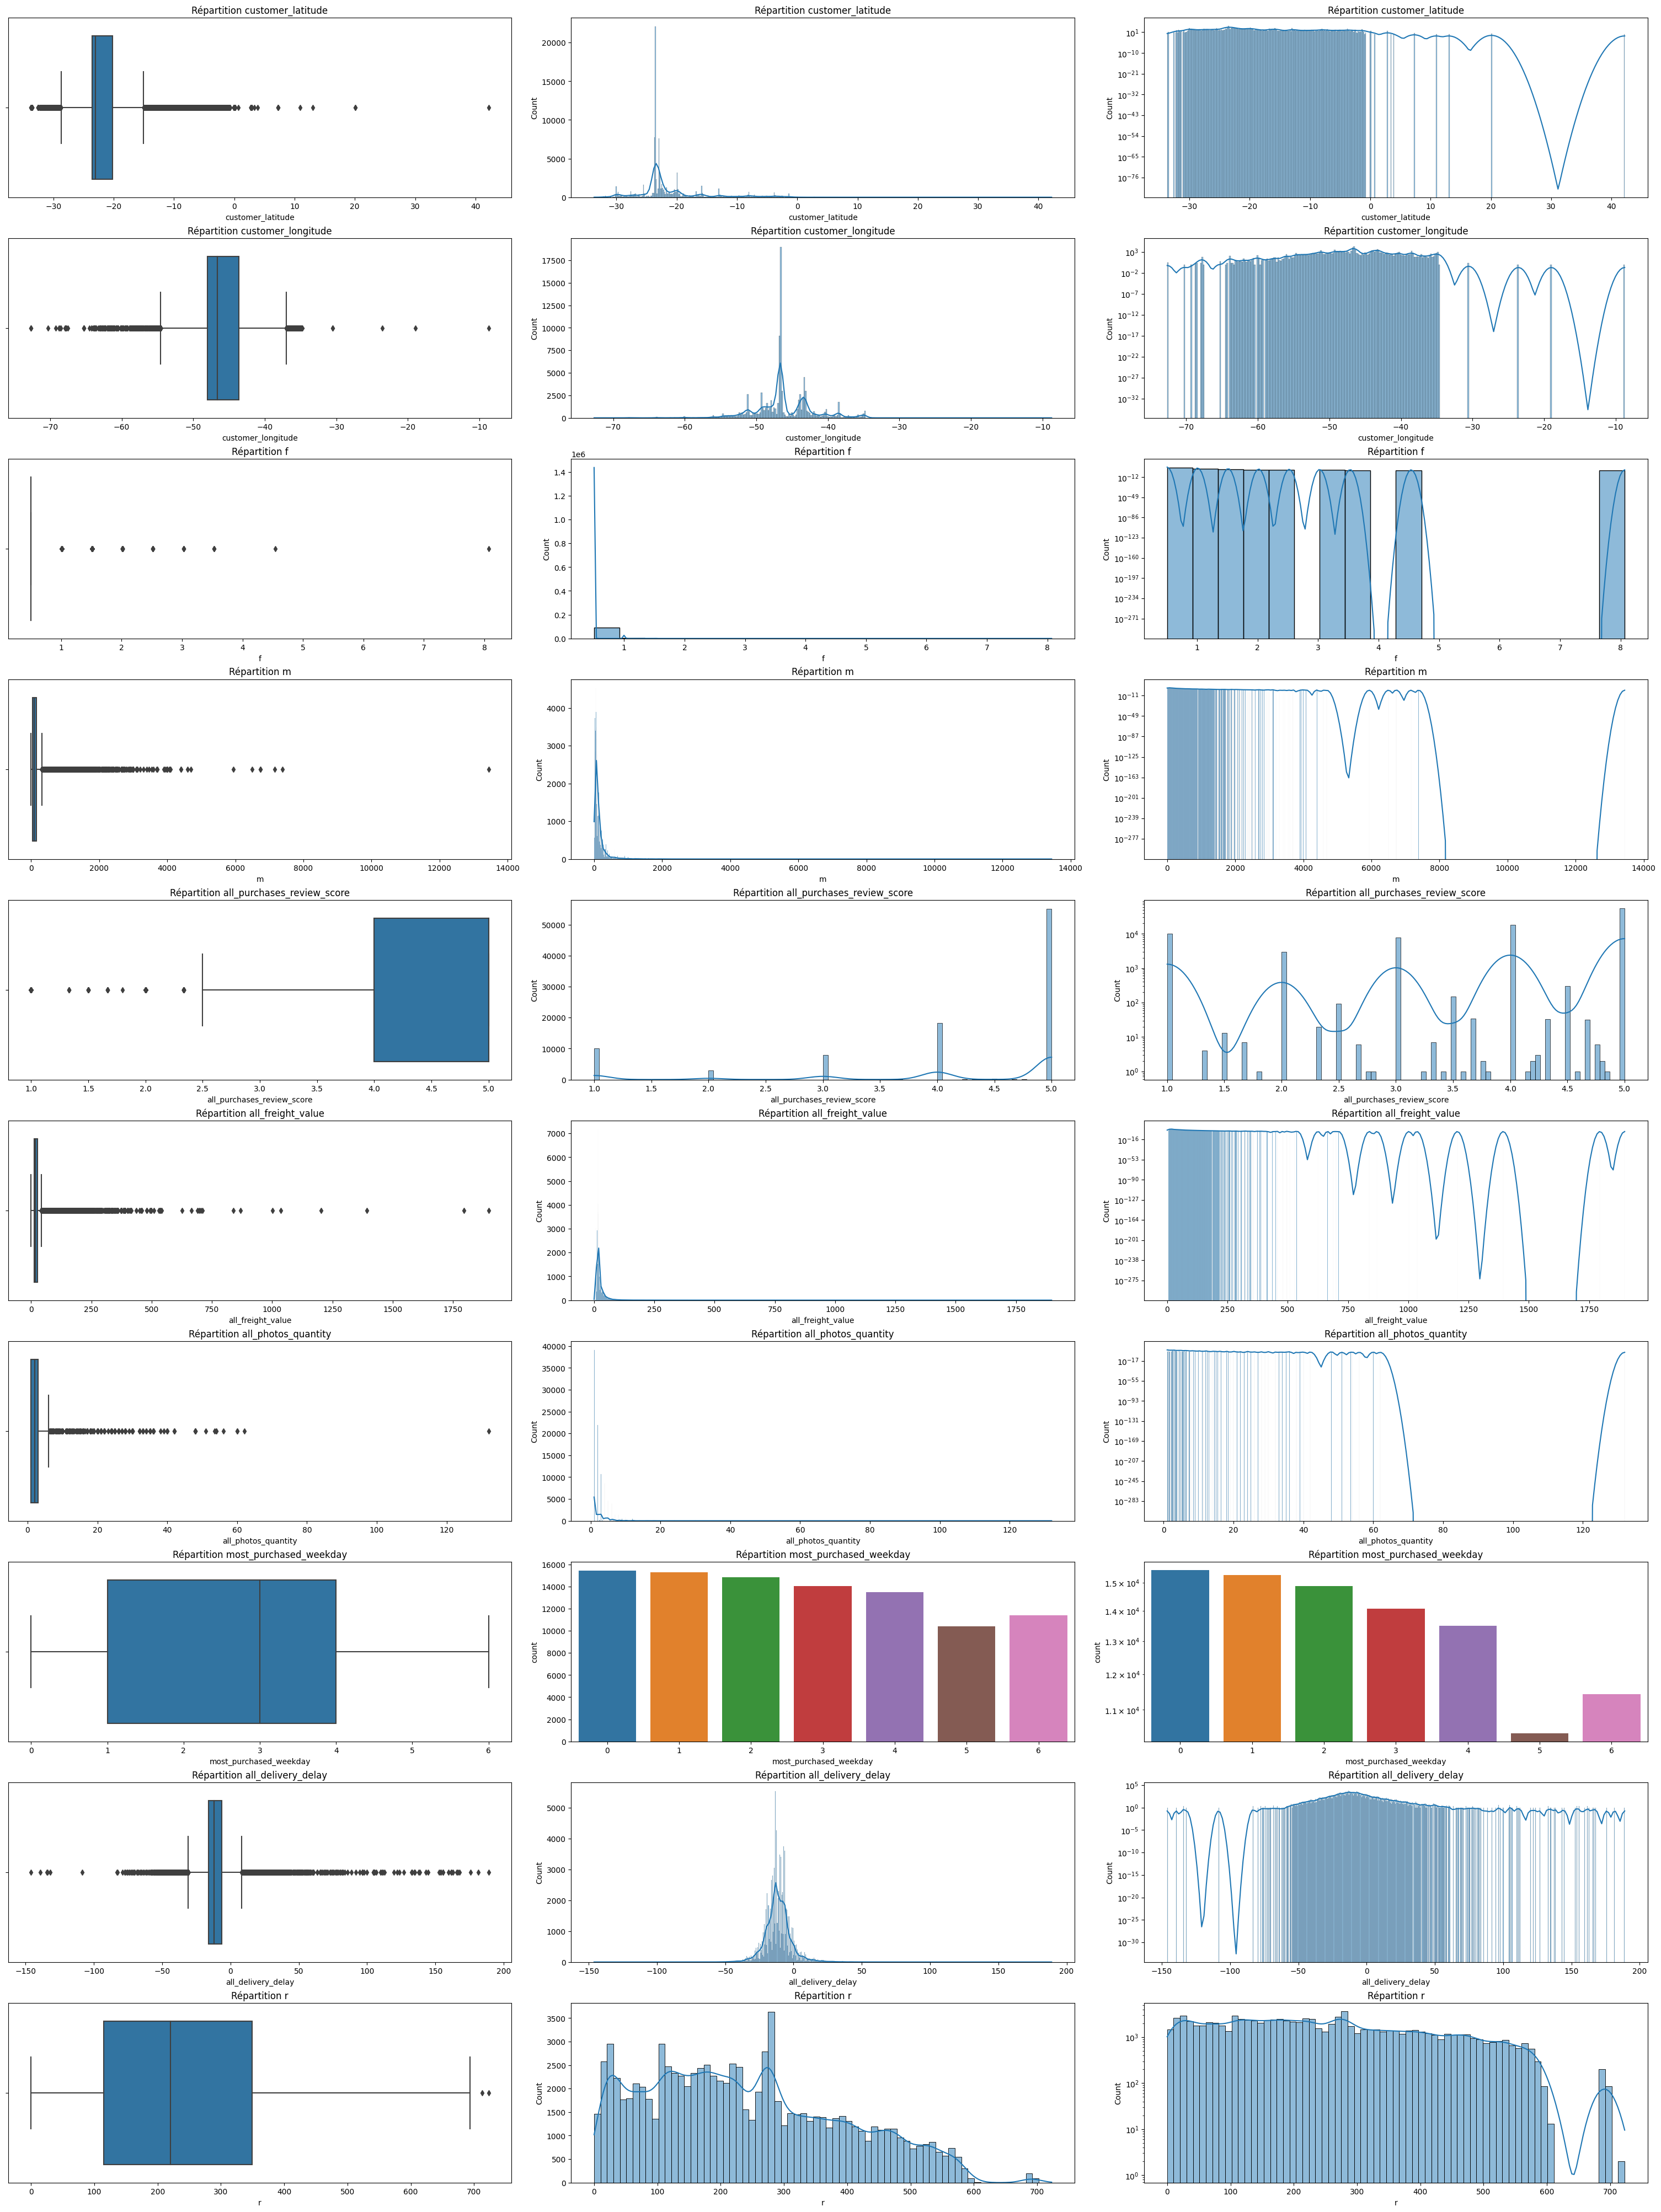

In [54]:
num_cols = []
cat_cols = []
for c in df.columns:
    if df.dtypes[c]=="float64" or df.dtypes[c]=="int64":
        num_cols.append(c)
    elif df.dtypes[c]=="object":
        cat_cols.append(c)
        
df0 = df.copy()
fig, axes = plt.subplots(len(num_cols), 3, constrained_layout=True, figsize=(30, 40))

y = 0
for c in num_cols:
    sns.boxplot(data=df, x=c, ax=axes[y,0])
    if "weekday" in c:
        sns.countplot(data=df, x=c, ax=axes[y,1])
        sns.countplot(data=df, x=c, ax=axes[y,2])
    else:
        sns.histplot(data=df, x=c, kde=True, ax=axes[y,1])
        sns.histplot(data=df, x=c, kde=True, ax=axes[y,2])
    axes[y,0].set_title(f"Répartition {c}")
    axes[y,1].set_title(f"Répartition {c}")
    axes[y,2].set_title(f"Répartition {c}")
    axes[y,2].set_yscale('log')
    y += 1
plt.show()

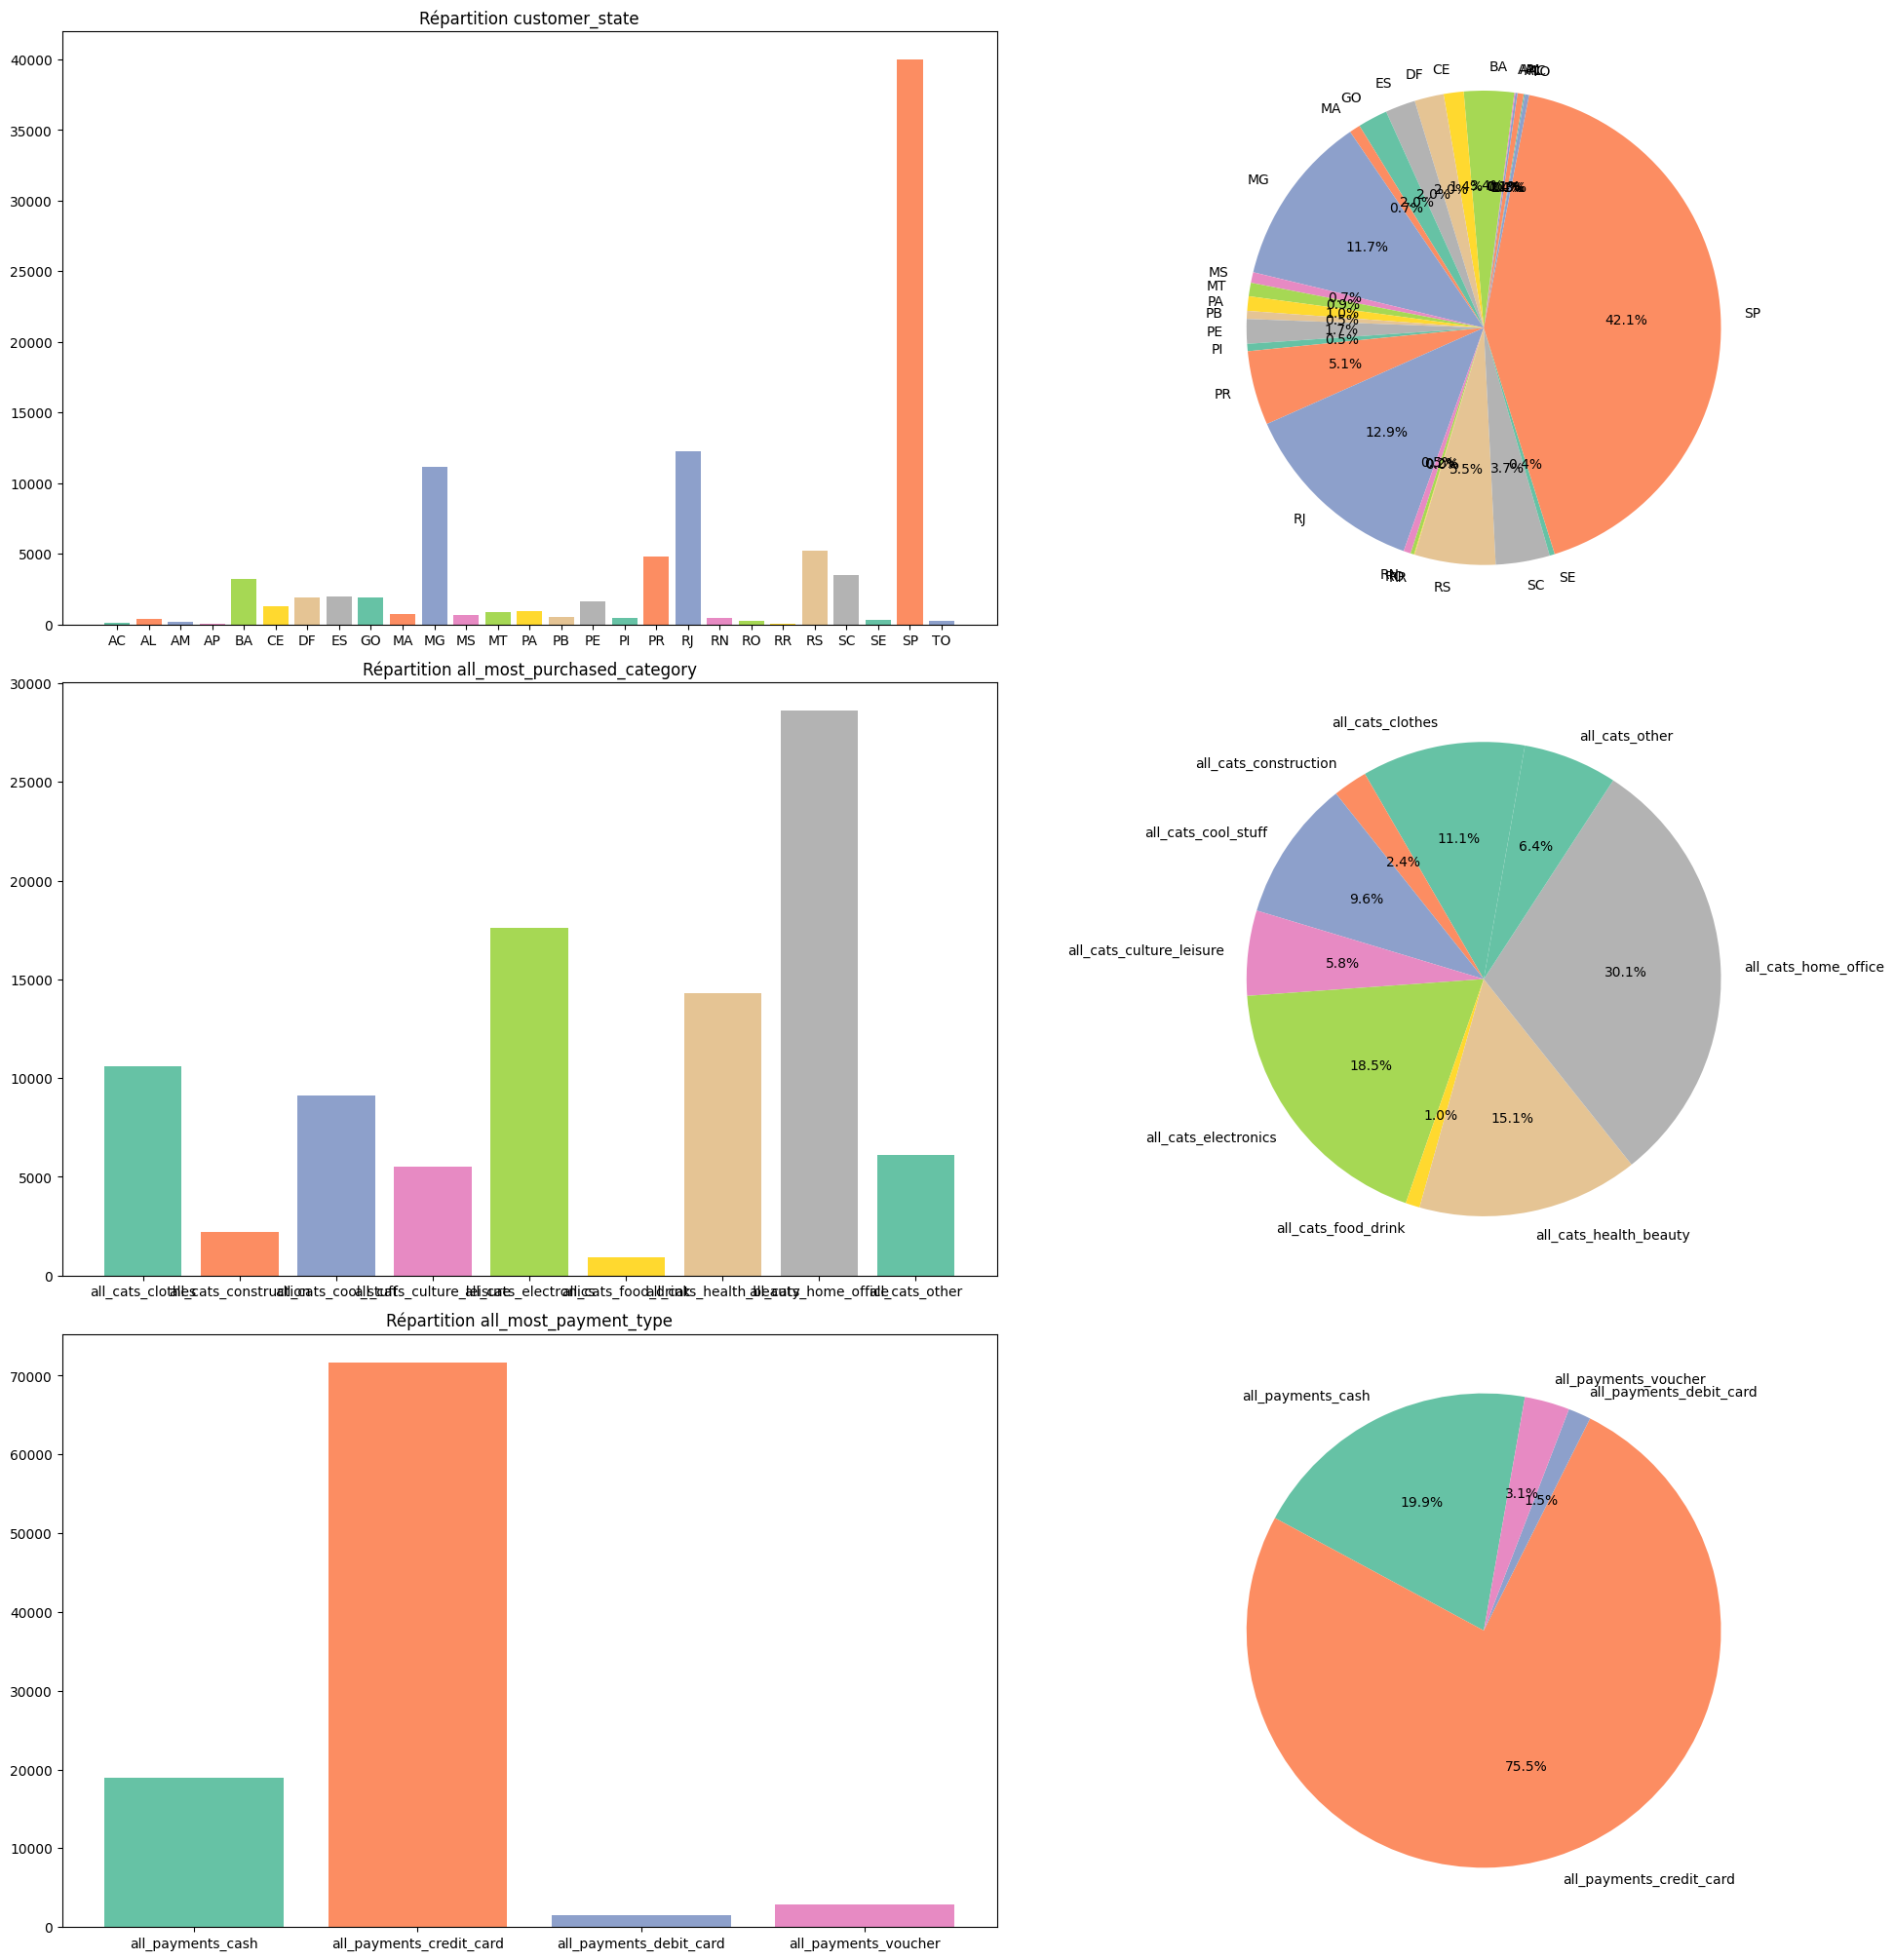

In [50]:
fig, axes = plt.subplots(len(cat_cols), 2, constrained_layout=True, figsize=(20, 20))

y = 0
for c in cat_cols:
    df_size = df.groupby(c).size().reset_index(name='size')
    # Unique category labels: 'D', 'F', 'G', ...
    color_labels = df_size[c].unique()

    # List of RGB triplets
    rgb_values = sns.color_palette("Set2", df_size.shape[0])

    # Map label to RGB
    color_map = dict(zip(color_labels, rgb_values))
    df_size["color"] = df_size[c].map(color_map)
    
    axes[y,0].bar(df_size[c], df_size["size"], color=df_size["color"])
    axes[y,0].set_title(f"Répartition {c}")
    axes[y,1].pie(df_size["size"], labels=df_size[c], autopct='%1.1f%%', startangle=80, shadow=False, colors=df_size["color"])
    y += 1
plt.show()

# Analyse bivariée

In [55]:
df_corr = df.loc[:, num_cols].corr() # Generate correlation matrix

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)
fig.update_layout(
    width=800,
    height= 800
)

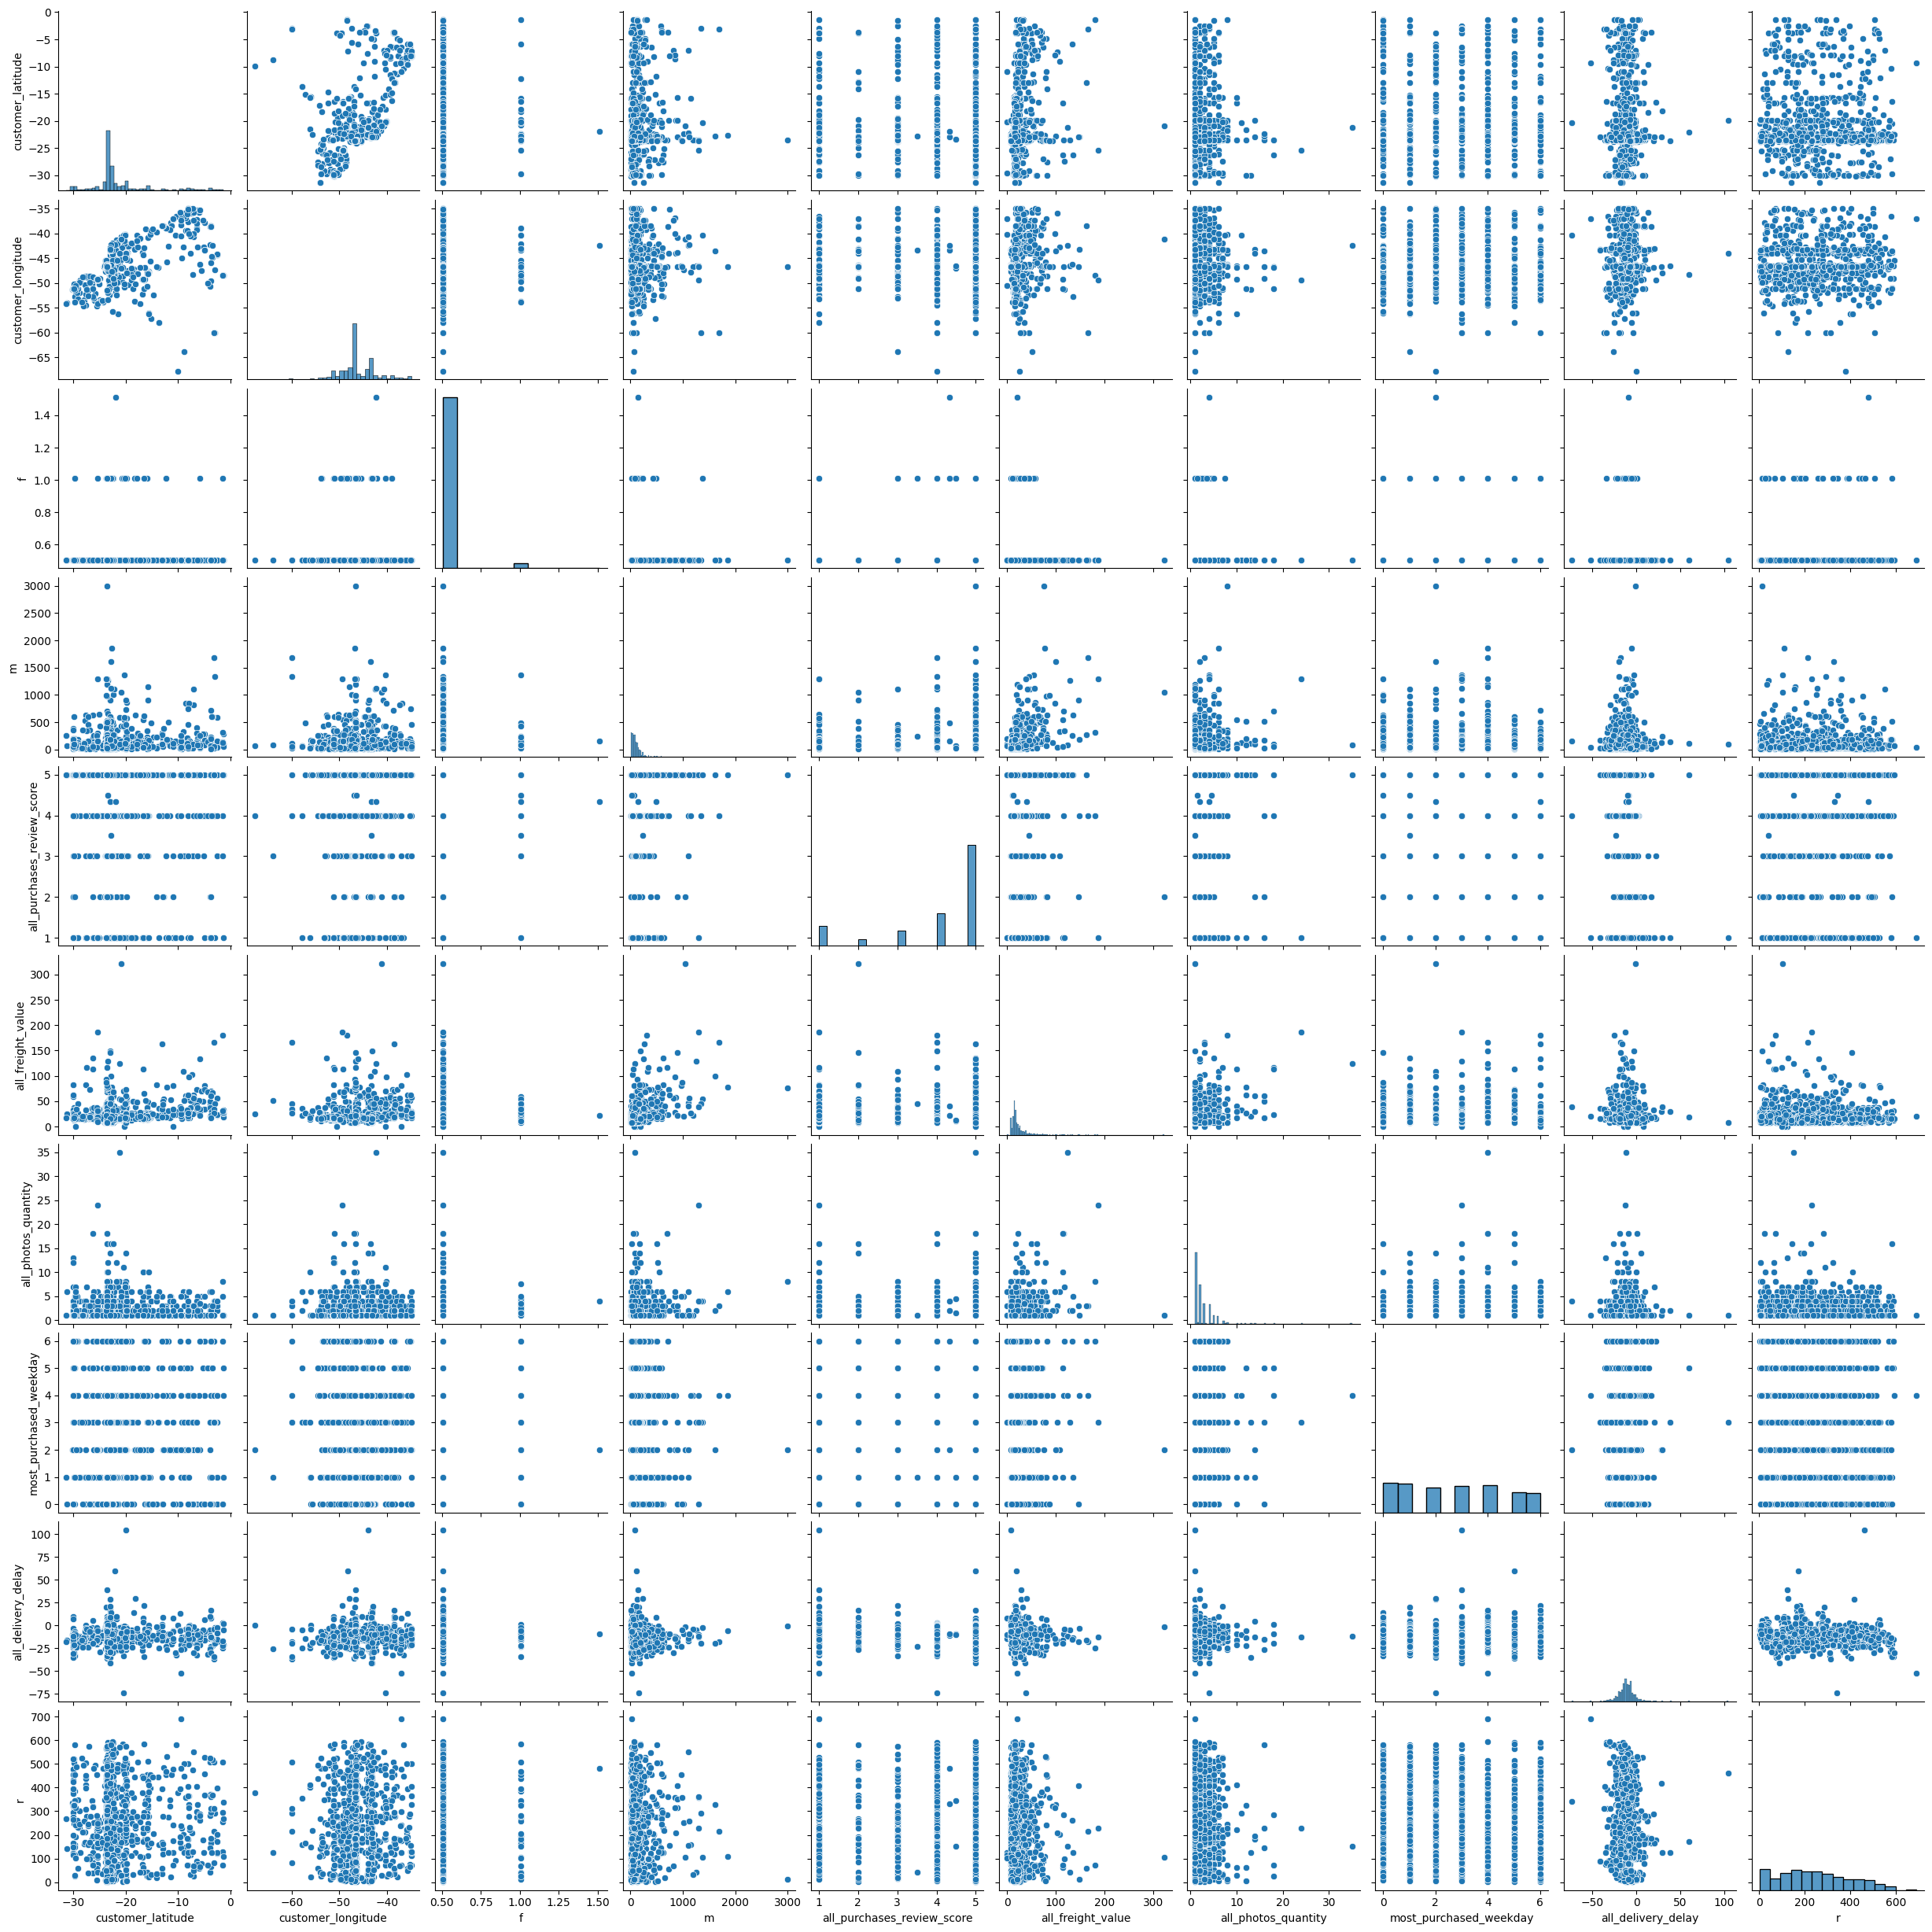

In [56]:
sns.pairplot(df.sample(1000).loc[:, num_cols])
plt.show()

## Anova

In [57]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

In [58]:
box_cols_num = dict()

df_eta = pd.DataFrame()

for num_col in num_cols:
    if num_col in ['customer_latitude', 'customer_longitude']:
        continue
        
    out = f"### {num_col}\n| Feature | ETA² | Corrélation avec {num_col}|\n"
    out += "|-----------|-----------|-----------|\n"

    etas = {}

    for cat_col in cat_cols:
        etas[cat_col] = eta_squared(df[cat_col], df[num_col])
    etas = dict(sorted(etas.items(), key=lambda item: item[1], reverse=True))
    eta2 = {}
    eta2["numeric_col"] = num_col
    for c in etas:
        effect_size = "Négligeable"
        eta2[c] = 0
        if etas[c] >= 0.14:
            effect_size = "Grande"
            eta2[c] = 3
            if c not in box_cols_num:
                box_cols_num[c] = []
            box_cols_num[c].append(num_col)
        elif etas[c] >= 0.06:
            effect_size = "Moyenne"
            eta2[c] = 2
        elif etas[c] >= 0.01:
            effect_size = "Petite"
            eta2[c] = 1
        out += f"""| {c} | {etas[c]} | {effect_size} |\n"""
    df_eta2 = pd.DataFrame([eta2])
    df_eta = pd.concat([df_eta, df_eta2], ignore_index=True)

    display(md(out))
    

### f
| Feature | ETA² | Corrélation avec f|
|-----------|-----------|-----------|
| all_most_purchased_category | 0.001444996785307971 | Négligeable |
| customer_state | 0.00026499232203834513 | Négligeable |
| all_most_payment_type | 9.200901007312574e-05 | Négligeable |


### m
| Feature | ETA² | Corrélation avec m|
|-----------|-----------|-----------|
| all_most_purchased_category | 0.01180060971603288 | Petite |
| customer_state | 0.004880944958876446 | Négligeable |
| all_most_payment_type | 0.003135053645109197 | Négligeable |


### all_purchases_review_score
| Feature | ETA² | Corrélation avec all_purchases_review_score|
|-----------|-----------|-----------|
| customer_state | 0.008862760138624746 | Négligeable |
| all_most_purchased_category | 0.002352488400761094 | Négligeable |
| all_most_payment_type | 6.415118332214614e-05 | Négligeable |


### all_freight_value
| Feature | ETA² | Corrélation avec all_freight_value|
|-----------|-----------|-----------|
| customer_state | 0.06542387638668379 | Moyenne |
| all_most_payment_type | 0.0201536588696416 | Petite |
| all_most_purchased_category | 0.013182108325249178 | Petite |


### all_photos_quantity
| Feature | ETA² | Corrélation avec all_photos_quantity|
|-----------|-----------|-----------|
| all_most_payment_type | 0.02528733648469483 | Petite |
| all_most_purchased_category | 0.0115206514642053 | Petite |
| customer_state | 0.0007983133764982069 | Négligeable |


### most_purchased_weekday
| Feature | ETA² | Corrélation avec most_purchased_weekday|
|-----------|-----------|-----------|
| all_most_payment_type | 0.0021891496136931185 | Négligeable |
| customer_state | 0.0003122812734512916 | Négligeable |
| all_most_purchased_category | 0.00020958438126981896 | Négligeable |


### all_delivery_delay
| Feature | ETA² | Corrélation avec all_delivery_delay|
|-----------|-----------|-----------|
| customer_state | 0.01565735545759125 | Petite |
| all_most_payment_type | 0.0012305556816044393 | Négligeable |
| all_most_purchased_category | 0.0003971908476537188 | Négligeable |


### r
| Feature | ETA² | Corrélation avec r|
|-----------|-----------|-----------|
| all_most_purchased_category | 0.0127277747041821 | Petite |
| customer_state | 0.004776368947213929 | Négligeable |
| all_most_payment_type | 0.004635097934875588 | Négligeable |


## Tests d'indépendance

In [59]:
out = ""
p_limit = 0.05
df_indep = pd.DataFrame()
for ref_col in num_cols:
    if ref_col in ['customer_latitude', 'customer_longitude']:
        continue
    dict_line = {"ref_col":ref_col, ref_col: np.NaN}
    y = pd.cut(df[ref_col], 20)
    out += f"""### **Test d'indépendance de {ref_col}**\n"""
    out += "| Feature comparée | p | chi2 | Conclusion |\n|-----|-----|-----|-----|\n"
    for num_col in num_cols:
        if num_col in ['customer_latitude', 'customer_longitude']:
            continue
        if num_col==ref_col:
            continue
        if len(df[num_col].unique())>20:
            x = pd.cut(df[num_col], 20).astype('category')
        else:
            x = df[num_col].astype('category')
        ct = pd.crosstab(x, y)
        stat_chi2, p, dof, expected_table = chi2_contingency(ct)
        out += f"| {num_col} | {p} | {stat_chi2} |"
        if p<p_limit:
            out += f"{ref_col} et {num_col} ne sont pas indépendantes|\n"
            dict_line[num_col] = "1"
        else:
            out += f"{ref_col} et {num_col} sont indépendantes|\n"
            dict_line[num_col] = "0"
    out += "\n\n"
    df_indep2 = pd.DataFrame([dict_line])
    df_indep = pd.concat([df_indep, df_indep2], ignore_index=True)
display(md(out))


### **Test d'indépendance de f**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| m | 1.2151545791214012e-143 | 923.6026128139009 |f et m ne sont pas indépendantes|
| all_purchases_review_score | 0.0 | 82909.17127312208 |f et all_purchases_review_score ne sont pas indépendantes|
| all_freight_value | 1.0 | 25.848467957407326 |f et all_freight_value sont indépendantes|
| all_photos_quantity | 0.00859534731745807 | 113.22113746011843 |f et all_photos_quantity ne sont pas indépendantes|
| most_purchased_weekday | 0.9399554808193143 | 33.79286029333947 |f et most_purchased_weekday sont indépendantes|
| all_delivery_delay | 0.9999999999821235 | 58.380658586568416 |f et all_delivery_delay sont indépendantes|
| r | 2.3246313419852206e-10 | 265.14460515642907 |f et r ne sont pas indépendantes|


### **Test d'indépendance de m**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 1.2151545791215398e-143 | 923.6026128139007 |m et f ne sont pas indépendantes|
| all_purchases_review_score | 7.146734190818188e-13 | 334.9614724295866 |m et all_purchases_review_score ne sont pas indépendantes|
| all_freight_value | 0.0 | 8874.920215156462 |m et all_freight_value ne sont pas indépendantes|
| all_photos_quantity | 0.0 | 1900.9971793261611 |m et all_photos_quantity ne sont pas indépendantes|
| most_purchased_weekday | 0.7294994889205133 | 52.9282315087882 |m et most_purchased_weekday sont indépendantes|
| all_delivery_delay | 0.014786928040628427 | 223.74017518182427 |m et all_delivery_delay ne sont pas indépendantes|
| r | 5.111326124297469e-12 | 327.0664981360254 |m et r ne sont pas indépendantes|


### **Test d'indépendance de all_purchases_review_score**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 0.0 | 82909.17127312206 |all_purchases_review_score et f ne sont pas indépendantes|
| m | 7.146734190817778e-13 | 334.96147242958665 |all_purchases_review_score et m ne sont pas indépendantes|
| all_freight_value | 0.00013309538221551018 | 325.8509985408727 |all_purchases_review_score et all_freight_value ne sont pas indépendantes|
| all_photos_quantity | 2.4636380038448022e-15 | 356.7962926006409 |all_purchases_review_score et all_photos_quantity ne sont pas indépendantes|
| most_purchased_weekday | 0.004878071662729479 | 142.6840383081461 |all_purchases_review_score et most_purchased_weekday ne sont pas indépendantes|
| all_delivery_delay | 0.0 | 15663.508838019714 |all_purchases_review_score et all_delivery_delay ne sont pas indépendantes|
| r | 7.937527179507609e-197 | 1693.0016253724316 |all_purchases_review_score et r ne sont pas indépendantes|


### **Test d'indépendance de all_freight_value**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 1.0 | 25.848467957407326 |all_freight_value et f sont indépendantes|
| m | 0.0 | 8874.920215156462 |all_freight_value et m ne sont pas indépendantes|
| all_purchases_review_score | 0.00013309538221551131 | 325.85099854087264 |all_freight_value et all_purchases_review_score ne sont pas indépendantes|
| all_photos_quantity | 0.0 | 48471.086883785 |all_freight_value et all_photos_quantity ne sont pas indépendantes|
| most_purchased_weekday | 0.5692170482362284 | 81.10473597732668 |all_freight_value et most_purchased_weekday sont indépendantes|
| all_delivery_delay | 0.9999999999614899 | 132.2340024959739 |all_freight_value et all_delivery_delay sont indépendantes|
| r | 0.013551723177727182 | 288.78092942679484 |all_freight_value et r ne sont pas indépendantes|


### **Test d'indépendance de all_photos_quantity**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 0.00859534731745807 | 113.22113746011843 |all_photos_quantity et f ne sont pas indépendantes|
| m | 0.0 | 1900.9971793261614 |all_photos_quantity et m ne sont pas indépendantes|
| all_purchases_review_score | 2.4636380038449427e-15 | 356.79629260064087 |all_photos_quantity et all_purchases_review_score ne sont pas indépendantes|
| all_freight_value | 0.0 | 48471.08688378501 |all_photos_quantity et all_freight_value ne sont pas indépendantes|
| most_purchased_weekday | 0.9149927056322934 | 45.627844370225354 |all_photos_quantity et most_purchased_weekday sont indépendantes|
| all_delivery_delay | 0.9999999999999659 | 72.16573474770605 |all_photos_quantity et all_delivery_delay sont indépendantes|
| r | 0.004186984194043188 | 222.57880166320615 |all_photos_quantity et r ne sont pas indépendantes|


### **Test d'indépendance de most_purchased_weekday**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 0.9399554808193145 | 33.792860293339466 |most_purchased_weekday et f sont indépendantes|
| m | 0.7294994889205135 | 52.928231508788194 |most_purchased_weekday et m sont indépendantes|
| all_purchases_review_score | 0.004878071662729479 | 142.6840383081461 |most_purchased_weekday et all_purchases_review_score ne sont pas indépendantes|
| all_freight_value | 0.5692170482362284 | 81.10473597732668 |most_purchased_weekday et all_freight_value sont indépendantes|
| all_photos_quantity | 0.9149927056322934 | 45.627844370225354 |most_purchased_weekday et all_photos_quantity sont indépendantes|
| all_delivery_delay | 3.608928367268258e-23 | 322.1608887912158 |most_purchased_weekday et all_delivery_delay ne sont pas indépendantes|
| r | 1.1865252378617886e-140 | 965.6051360680128 |most_purchased_weekday et r ne sont pas indépendantes|


### **Test d'indépendance de all_delivery_delay**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 0.9999999999821235 | 58.380658586568416 |all_delivery_delay et f sont indépendantes|
| m | 0.014786928040628335 | 223.74017518182433 |all_delivery_delay et m ne sont pas indépendantes|
| all_purchases_review_score | 0.0 | 15663.508838019714 |all_delivery_delay et all_purchases_review_score ne sont pas indépendantes|
| all_freight_value | 0.9999999999614899 | 132.23400249597387 |all_delivery_delay et all_freight_value sont indépendantes|
| all_photos_quantity | 0.9999999999999659 | 72.16573474770604 |all_delivery_delay et all_photos_quantity sont indépendantes|
| most_purchased_weekday | 3.608928367268258e-23 | 322.1608887912158 |all_delivery_delay et most_purchased_weekday ne sont pas indépendantes|
| r | 0.0 | 25600.810587307762 |all_delivery_delay et r ne sont pas indépendantes|


### **Test d'indépendance de r**
| Feature comparée | p | chi2 | Conclusion |
|-----|-----|-----|-----|
| f | 2.3246313419852206e-10 | 265.14460515642907 |r et f ne sont pas indépendantes|
| m | 5.111326124297469e-12 | 327.0664981360254 |r et m ne sont pas indépendantes|
| all_purchases_review_score | 7.937527179508519e-197 | 1693.0016253724311 |r et all_purchases_review_score ne sont pas indépendantes|
| all_freight_value | 0.013551723177727182 | 288.78092942679484 |r et all_freight_value ne sont pas indépendantes|
| all_photos_quantity | 0.004186984194043189 | 222.57880166320618 |r et all_photos_quantity ne sont pas indépendantes|
| most_purchased_weekday | 1.1865252378617888e-140 | 965.6051360680127 |r et most_purchased_weekday ne sont pas indépendantes|
| all_delivery_delay | 0.0 | 25600.810587307762 |r et all_delivery_delay ne sont pas indépendantes|




In [60]:
for col in df_indep.columns:
    df_indep[col] = df_indep[col].astype(str)
fig = px.imshow(df_indep.iloc[:,range(1, len(df_indep.columns))], y=df_indep["ref_col"], title="toto")
fig.show()

## Analyse métier

In [61]:
df = get_olist_dataframe(db_file=db_file, dir_path="../assets/olist")
r = clean(
    df, 
    use_features=[
        "most_payment_type", "weekday", "review", "delivery", "last_timestamp", "customer_state", "customer_location", "most_purchased_category", "customer_unique_id",
        "first_purchase_timestamp",  "delivery", "freight_value", "photos_quantity", "payment_types", "categories"
    ], use_standard_scaler=False, use_min_max_scaler=False)
df = r["data"]

featureSplitterTransformer, from_column=last_categories
featureSplitterTransformer, from_column=all_purchases_categories
featureSplitterTransformer, from_column=last_payments
featureSplitterTransformer, from_column=all_purchases_payments
last_categories
all_purchases_categories
last_payments
all_purchases_payments


### Evolution des ventes par semaine

In [62]:
df_count_last_amount = df.groupby("last_timestamp_weekday")['last_amount'].size().reset_index().sort_values('last_timestamp_weekday')
df_sum_last_amount = df.groupby("last_timestamp_weekday")['last_amount'].sum().reset_index().sort_values('last_timestamp_weekday')
df_mean_last_amount = df.groupby("last_timestamp_weekday")['last_amount'].mean().reset_index().sort_values('last_timestamp_weekday')
fig = go.Figure()
fig.add_trace(go.Scatter( x=df_count_last_amount['last_timestamp_weekday'], y=df_count_last_amount["last_amount"], mode='lines', line=dict(color='#1f77b4'), name='Nombre ventes'))
fig.add_trace(go.Scatter( x=df_sum_last_amount['last_timestamp_weekday'], y=df_sum_last_amount["last_amount"], mode='lines', line=dict(color='#ff7f0e'), name='Somme ventes', yaxis="y2"))
fig.add_trace(go.Scatter( x=df_mean_last_amount['last_timestamp_weekday'], y=df_mean_last_amount["last_amount"], mode='lines', line=dict(color='#d62728'), name='Moyenne par vente', yaxis="y3"))


fig.update_layout(
    title="Evolution des ventes cumulées par jour de la semaine",
    xaxis=dict(
        domain=[0.2, 1],
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5, 6],
        ticktext = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    ),
    yaxis=dict(
        title="Nombre de ventes",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="Somme des ventes",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        autoshift=True,
    ),
    yaxis3=dict(
        title="moyenne par vente",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="free",
        overlaying="y",
        autoshift=True,
    ),
)
fig.show()

### Evolution du nombre de clients et du chiffre d'affaire

In [75]:

df_summed_new_customers = df.groupby([pd.Grouper(key='first_purchase_timestamp', freq='W-MON')])['customer_unique_id'].count().reset_index().sort_values('first_purchase_timestamp')
df_summed_new_customers["nb_customers"] = df_summed_new_customers["customer_unique_id"].cumsum()

df_summed_last_amount = df.groupby([pd.Grouper(key='last_timestamp', freq='W-MON')])['last_amount'].sum().reset_index().sort_values('last_timestamp')
df_summed_last_amount["ca_total"] = df_summed_last_amount["last_amount"].cumsum()

fig = go.Figure()
colors_cycle = itertools.cycle(px.colors.qualitative.Dark24)
color = next(colors_cycle)
# Add traces
fig.add_trace(
    go.Scatter(
        x=df_summed_new_customers["first_purchase_timestamp"], 
        y=df_summed_new_customers["customer_unique_id"], 
        name="Nb nouveaux clients dans la période",
        marker=dict(
            color = color
        )
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_summed_new_customers["first_purchase_timestamp"], 
        y=df_summed_new_customers["nb_customers"], 
        name="Nb clients cumulés",
        yaxis="y2",
        line=dict(dash="dot"),
        marker=dict(
            color = color
        )
    ),
)
color = next(colors_cycle)
fig.add_trace(
    go.Scatter(
        y=df_summed_last_amount["last_amount"], 
        x=df_summed_last_amount["last_timestamp"], 
        name="CA dans la période",
        yaxis="y3",
        marker=dict(
            color = color
        )
    ),
)


fig.add_trace(
    go.Scatter(
        y=df_summed_last_amount["ca_total"], 
        x=df_summed_last_amount["last_timestamp"], 
        name="CA cumulé",
        yaxis="y4",
        line=dict(dash="dot"),
        marker=dict(
            color = color
        )
    ),
)

# Add figure title
fig.update_layout(
    title_text="Evolution des nouveaux clients et du CA",
    yaxis=dict(title="Nb nouveaux clients dans la période"),
    yaxis2=dict(
        title="Nb clients cumulés", 
        anchor="free",
        overlaying="y",
        side="left",
        position=0.00
    ),
    yaxis3=dict(
        title="CA dans la période", 
        anchor="free",
        overlaying="y",
        side="right",
        position=0.90
    ),
    yaxis4=dict(
        title="CA cumulé", 
        anchor="free",
        overlaying="y",
        side="right",
        position=0.97
    ),
)


# Set x-axis title
fig.update_xaxes(title_text="Période")

fig.update_layout(
    width=1300,
    height=600,
    xaxis=dict(
        domain=[0.1, 0.8]
    ),
)
fig.show()

### Evolution des ventes hebdomadaires par type de produit

In [64]:
fig = go.Figure()
colors_cycle = itertools.cycle(px.colors.qualitative.Dark24)
for c in df["last_most_purchased_category"].unique():
    color = next(colors_cycle)
    df2 = df.loc[df["last_most_purchased_category"]==c].groupby([pd.Grouper(key='last_timestamp', freq='W-MON')]).agg({"last_amount": "sum"}).reset_index()
    df2["last_amount_cum"] = df2["last_amount"].cumsum()

    fig.add_trace(
        go.Scatter(
            x=df2["last_timestamp"], 
            y=df2["last_amount"], 
            mode='lines',
            name=c[9:],
            marker=dict(
                color = color
            )
        )
    )
    fig.add_trace(
        go.Scatter(
            x=df2["last_timestamp"], 
            y=df2["last_amount_cum"], 
            mode='lines',
            name=f"{c[9:]} cumulé",
            marker=dict(
                color = color
            ),
            line=dict(dash="dot"),
            yaxis="y2"
        )
    )
    
    
fig.update_layout(
    title_text="Evolution des ventes hebdomadaires par type de produit",
    yaxis=dict(title="Ventes hebdomadaires"),
    yaxis2=dict(
        title="Ventes hebdomadaires cumulées", 
        anchor="free",
        overlaying="y",
        side="right",
        position=0.9
    ),
)

fig.update_xaxes(title_text="Période")

fig.update_layout(
    width=1300,
    xaxis=dict(
        domain=[0.05, 0.9]
    ),
)
fig.show()



In [65]:
categorie_cols = []
for c in df.columns:
    if c.startswith("all_cats_"):
        categorie_cols.append(c)
        
payed_category = {}
for c in categorie_cols:
    payed_category[c[9:]] = df[c].sum()

fig = go.Figure(data=[go.Pie(labels=list(payed_category.keys()), values=list(payed_category.values()))])
fig.update_layout(width=1000, height=800, title="Répartition des montants payés par catégorie de produit")
fig.show()

### Evolution des ventes hebdomadaires par type de paiement

In [66]:

fig = go.Figure()
colors_cycle = itertools.cycle(px.colors.qualitative.Dark24)
for c in df["last_most_payment_type"].unique():
    color = next(colors_cycle)
    df2 = df.loc[df["last_most_payment_type"]==c].groupby([pd.Grouper(key='last_timestamp', freq='W-MON')]).agg({"last_amount": "sum"}).reset_index().sort_values("last_timestamp")
    df2["last_amount_cum"] = df2["last_amount"].cumsum()
    fig.add_trace(
        go.Scatter(
            x=df2["last_timestamp"], 
            y=df2["last_amount"], 
            mode='lines',
            name=f"{c[13:]}",
            marker=dict(
                color = color
            )
        )
    )
    fig.add_trace(
        go.Scatter(
            x=df2["last_timestamp"], 
            y=df2["last_amount_cum"], 
            mode='lines',
            name=f"{c[13:]} cumulé",
            marker=dict(
                color = color
            ),
            line=dict(dash="dot"),
            yaxis="y2"
        )
    )
fig.update_layout(
    title_text="Evolution des ventes hebdomadaires par type de paiement",
    yaxis=dict(title="Ventes hebdomadaires"),
    yaxis2=dict(
        title="Ventes hebdomadaires cumulées", 
        anchor="free",
        overlaying="y",
        side="right",
        position=0.9
    ),
)

fig.update_xaxes(title_text="Période")

fig.update_layout(
    width=1300,
    xaxis=dict(
        domain=[0.05, 0.9]
    ),
)
fig.show()

### Répartition des montants payés par moyen de paiement

In [67]:
payments = {}
tot = 0
for c in ["all_payments_credit_card","all_payments_cash","all_payments_voucher","all_payments_debit_card","all_payments_not_defined"]:
    payments[c[13:]] = df[c].sum()

fig = go.Figure(data=[go.Pie(labels=list(payments.keys()), values=list(payments.values()))])
fig.update_layout(width=1000, height=800, title="Répartition des montants payés par moyen de paiement")
fig.show()

### Evolution de review_score et du délai de livraison hedomadaires

In [68]:

df_mean_last_review = df.groupby([pd.Grouper(key='last_timestamp', freq='W-MON')])['last_review_score'].mean().reset_index().sort_values('last_timestamp')
df_mean_last_delay = df.groupby([pd.Grouper(key='last_timestamp', freq='W-MON')])['last_delivery_delay'].mean().reset_index().sort_values('last_timestamp')

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df_mean_last_review["last_timestamp"], y=df_mean_last_review["last_review_score"], mode='lines',name="review_score"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_mean_last_delay["last_timestamp"], y=df_mean_last_delay["last_delivery_delay"], mode='lines',name="last_delivery_delay"), row=2, col=1)

fig.update_layout(title="Evolution de review_score et du délai de livraison hedomadaires")
fig.show()


### Evolution des avis hebdomadaires par type de produit

In [69]:
fig = go.Figure()
for c in df["last_most_purchased_category"].unique():
    df2 = df.loc[df["last_most_purchased_category"]==c].groupby([pd.Grouper(key='last_timestamp', freq='W-MON')]).agg({"last_review_score": "mean"}).reset_index()
    fig.add_trace(go.Scatter(x=df2["last_timestamp"], y=df2["last_review_score"], mode='lines',name=c[9:]))
    
fig.update_layout(title="Evolution des avis hebdomadaires par type de produit")
fig.show()




### Répartition des derniers achats de clients par type d'achat et par état

In [76]:
df_by_state_by_cat = df.groupby(["customer_state", "all_most_purchased_category"]).agg({"last_amount": "sum"}).reset_index()
for s in df_by_state_by_cat["customer_state"].unique():
    for c in df_by_state_by_cat["all_most_purchased_category"].unique():
        if df_by_state_by_cat.loc[(df_by_state_by_cat["customer_state"]==s) & (df_by_state_by_cat["all_most_purchased_category"]==c)].shape[0] == 0:
            new_row = {'customer_state':s, 'all_most_purchased_category':c, 'last_amount':0}
            df_by_state_by_cat = pd.concat([pd.DataFrame(new_row, index=[0]), df_by_state_by_cat.loc[:]])
            
            
with warnings.catch_warnings(record=True):
    fig = px.line_polar(df_by_state_by_cat.sort_values(["customer_state", "all_most_purchased_category"]), r='last_amount', theta="all_most_purchased_category", color='customer_state', line_close=True)
    fig.update_layout(
        height=1000,
        title="Répartition des derniers achats de clients par type d'achat et par état"
    )
    fig.show()

### Répartition des achats de clients par type de paiement et par état

In [71]:
df_by_state_by_cat = df.groupby(["customer_state", "all_most_payment_type"]).agg({"last_amount": "sum"}).reset_index()
for s in df_by_state_by_cat["customer_state"].unique():
    for c in df_by_state_by_cat["all_most_payment_type"].unique():
        if df_by_state_by_cat.loc[(df_by_state_by_cat["customer_state"]==s) & (df_by_state_by_cat["all_most_payment_type"]==c)].shape[0] == 0:
            new_row = {'customer_state':s, 'all_most_payment_type':c, 'last_amount':0}
            df_by_state_by_cat = pd.concat([pd.DataFrame(new_row, index=[0]), df_by_state_by_cat.loc[:]])
            
            
with warnings.catch_warnings(record=True):
    fig = px.line_polar(df_by_state_by_cat.sort_values(["customer_state", "all_most_payment_type"]), r='last_amount', theta="all_most_payment_type", color='customer_state', line_close=True)
    fig.update_layout(
        height=800,
        title="Répartition des achats de clients par type de paiement et par état"
    )
    fig.show()

### Répartition des CA par type d'achat et par jour de la semaine (toutes périodes confondues)

In [72]:
df_by_weekday_by_cat = df.groupby(["most_purchased_weekday", "last_most_purchased_category"]).agg({"last_amount": "sum"}).reset_index()
for d in df_by_weekday_by_cat["most_purchased_weekday"].unique():
    for c in df_by_weekday_by_cat["last_most_purchased_category"].unique():
        if df_by_weekday_by_cat.loc[(df_by_weekday_by_cat["most_purchased_weekday"]==d) & (df_by_weekday_by_cat["last_most_purchased_category"]==c)].shape[0] == 0:
            new_row = {'most_purchased_weekday':d, 'last_most_purchased_category':c, 'last_amount':0}
            df_by_weekday_by_cat = pd.concat([pd.DataFrame(new_row, index=[0]), df_by_weekday_by_cat.loc[:]])
            
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==0, "most_purchased_weekday"] = "0 Lundi"
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==1, "most_purchased_weekday"] = "1 Mardi"
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==2, "most_purchased_weekday"] = "2 Mercredi"
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==3, "most_purchased_weekday"] = "3 Jeudi"
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==4, "most_purchased_weekday"] = "4 Vendredi"
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==5, "most_purchased_weekday"] = "5 Samedi"
df_by_weekday_by_cat.loc[df_by_weekday_by_cat["most_purchased_weekday"]==6, "most_purchased_weekday"] = "6 Dimanche"


with warnings.catch_warnings(record=True):
    fig = px.line_polar(df_by_weekday_by_cat.sort_values(["most_purchased_weekday", "last_most_purchased_category"]), r='last_amount', color="last_most_purchased_category", theta='most_purchased_weekday', line_close=True)
    fig.update_layout(
        height=800,
        title="Répartition des CA par type d'achat et par jour de la semaine (toutes périodes confondues)"
    )
    fig.show()


### Répartition géographique

In [73]:
fig = px.density_mapbox(df, lat='customer_latitude', lon='customer_longitude', z='m', radius=10,
                        center=dict(lat=latitude_avg, lon=longitude_avg), zoom=3,
                        mapbox_style="stamen-terrain")
fig.update_layout(height=800)
fig.show()

## Conclusion

- baisse de ventes et de CA le samedi et le dimanche
- nb de clients en croissance
- CA en croissance
- les ventes hebdomadaires ne sont pas uniformes 
- les catégories les plus vendues:
  - home_office 27.1%
  - electronics 17.2%
  - health_beauty 15.5%
  - cool_stuff 13.7%
  - clothes 9.89%
- les modes de paiments utilisés:
  - carte de crédit 78.4%
  - espèce 17.9%
  - coupons 2.3%
  - cartes de debit 1.35%
- il existe une relation linéaire entre les paiments par carte de crédit et le montant payé: plus le montant est élevé, plus la carte de crédit est privilégiée
- il existe une relation opposée entre le review_score et delivery_delay
- il y a une relation entre le montant de l livraison et et la destination
- les habitudes d'achats (catégories de produits et moyens de paiement) sont à peu près les mêmes quelque-soit la provenance géographique des clients